Preliminaries:

# ECON3030: Numerical methods in economics

Name: Fasiha Adrees

Student ID: 20385690

### Question 1: Preliminaries
#### 1a. Importing the Data

In [26]:
# 1a. Import .csv using pandas library and call dataframe pwt101

import pandas as pd
import numpy as np
from tabulate import tabulate

url = 'https://raw.githubusercontent.com/jivizcaino/PWT10.1/main/pwt101.csv' # url hosting .csv file
pwt101 = pd.read_csv(url) 
pwt101 

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617,39798.645,13.815,6.394,NaN,2.585,...,0.140,-0.288,-0.052,0.479,0.651,0.541,0.617,0.533,0.426,1.778
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203,40963.191,14.030,6.504,NaN,2.616,...,0.132,-0.251,-0.016,0.471,0.651,0.540,0.620,0.520,0.419,1.729
12807,ZWE,Zimbabwe,US Dollar,2017,44672.176,44316.742,14.237,6.612,NaN,2.648,...,0.127,-0.203,-0.040,0.474,0.640,0.520,0.620,0.552,0.419,1.756
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109,43420.898,14.439,6.715,NaN,2.681,...,0.144,-0.264,-0.021,0.544,0.655,0.530,0.641,0.562,0.427,1.830


#### 1b. Filtering the Data

In [27]:
# 1b. Filter dataframe for variable of interest
# variables of interest: rgdpo, emp, avh, hc, labsh, rtfpna, cn

# create a subset of variables of interest

pwt101_subset = pwt101[['countrycode', 'country', 'year', 'rgdpo', 'pop', 'emp', 'avh', 'hc', 'labsh', 'rtfpna', 'cn']]
pwt101_subset = pwt101_subset.dropna(axis=0, how='any') # drop rows with values of NaN
pwt101_subset

,countrycode,country,year,rgdpo,pop,emp,avh,hc,labsh,rtfpna,cn
354,ARG,Argentina,1954,52254.770,18.517,7.037,2049.511,1.874,0.441,1.195,75800.469
355,ARG,Argentina,1955,56072.500,18.863,7.148,2053.407,1.889,0.441,1.221,80596.414
356,ARG,Argentina,1956,57550.316,19.206,7.244,2057.311,1.902,0.441,1.207,84654.469
357,ARG,Argentina,1957,60560.367,19.544,7.342,2061.222,1.915,0.441,1.205,87753.469
358,ARG,Argentina,1958,65162.113,19.878,7.441,2065.141,1.928,0.441,1.233,93118.813
...,...,...,...,...,...,...,...,...,...,...,...
12664,ZAF,South Africa,2014,710668.313,54.544,16.993,2209.091,2.676,0.552,1.072,2631893.000
12666,ZAF,South Africa,2016,713601.625,56.208,17.985,2218.455,2.763,0.568,1.009,2683380.250
12667,ZAF,South Africa,2017,726021.000,57.010,18.303,2197.033,2.809,0.570,1.000,2708887.000
12668,ZAF,South Africa,2018,732308.188,57.793,18.686,2191.363,2.858,0.571,0.980,2762087.000


#### 1c. Choosing the Year

In [28]:
# determining year with maximum number of observations

pwt101_subset.groupby('year').size().reset_index(name='# of obs')
pwt101_subset_years = pwt101_subset.groupby('year').size().reset_index(name='# of obs')
pwt101_subset_years # viewing dataframe in Data Wrangler, year 2002 is latest year that yields highest number of observations (64)
pwt101_subset['year'] == 2002
pwt101_2002 = pwt101_subset.loc[pwt101_subset['year'] == 2002]
pwt101_2002


,countrycode,country,year,rgdpo,pop,emp,avh,hc,labsh,rtfpna,cn
402,ARG,Argentina,2002,4.253422e+05,37.682,13.413,1710.037,2.709,0.318,0.886,1.693605e+06
612,AUS,Australia,2002,7.898732e+05,19.401,9.185,1808.121,3.516,0.601,0.951,3.187746e+06
682,AUT,Austria,2002,3.062885e+05,8.134,3.781,1782.848,3.150,0.584,0.986,1.116921e+06
892,BEL,Belgium,2002,3.584927e+05,10.365,4.188,1593.646,3.011,0.632,1.011,1.240596e+06
1172,BGR,Bulgaria,2002,8.446375e+04,7.866,2.963,1651.259,2.937,0.454,1.104,1.259492e+05
...,...,...,...,...,...,...,...,...,...,...,...
11812,TWN,Taiwan,2002,7.908176e+05,22.463,9.454,2111.897,2.815,0.742,0.864,1.854604e+06
12092,URY,Uruguay,2002,3.442416e+04,3.326,1.338,1635.879,2.539,0.511,0.779,1.368738e+05
12162,USA,United States,2002,1.439694e+07,287.279,138.152,1806.691,3.598,0.630,0.924,5.188883e+07
12372,VEN,Venezuela (Bolivarian Republic of),2002,1.946293e+05,25.100,9.786,1829.020,2.228,0.413,1.403,9.051208e+05


In [29]:
# 1d. Creating a table of descriptive characteristics characterizing output per worker for subset of year 2002

alpha = (1/3) # define alpha as 1/3
A_pwt = pwt101_2002['rtfpna'] # define A
k_alpha = pow((pwt101_2002['cn']) / (pwt101_2002['emp']), alpha) # define k alpha
H = ((pwt101_2002['avh']) / (pwt101_2002['cn'])) ** (1 - alpha) # define (avh * h)^(1 - a)
output_per_worker_2002 = (pwt101_2002['rgdpo']) / (pwt101_2002['emp'])


In [30]:
descriptive_stats = {
    'Statistic' : ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
        'Output per Worker' : [
            np.mean(output_per_worker_2002),
            np.median(output_per_worker_2002),
            np.std(output_per_worker_2002),
            np.min(output_per_worker_2002),
            np.max(output_per_worker_2002)
        ]
                    }



#### 1d. Descriptive Statistics for Subsample

In [31]:
# add percentiles (5, 10, 25, 50, 75, 90, 95, 99) to table

percentiles = {5, 10, 25, 50, 75, 90, 95, 99}
for p in percentiles:
    descriptive_stats['Statistic'].append(f'Percentile {p}')
    descriptive_stats['Output per Worker'].append(np.percentile(output_per_worker_2002, p))

descriptive_stats_df = pd.DataFrame(descriptive_stats)
descriptive_stats_df = descriptive_stats_df.round(2)
descriptive_stats_df
print(tabulate(descriptive_stats_df, headers='keys', tablefmt='pretty'))


+----+---------------+-------------------+
|    |   Statistic   | Output per Worker |
+----+---------------+-------------------+
| 0  |     Mean      |     52119.45      |
| 1  |    Median     |      47549.0      |
| 2  |    Std Dev    |     28755.86      |
| 3  |      Min      |      5827.42      |
| 4  |      Max      |     106349.28     |
| 5  | Percentile 99 |     105002.07     |
| 6  | Percentile 5  |     12189.91      |
| 7  | Percentile 10 |     15540.56      |
| 8  | Percentile 75 |     78990.21      |
| 9  | Percentile 50 |      47549.0      |
| 10 | Percentile 25 |     27444.43      |
| 11 | Percentile 90 |     85273.89      |
| 12 | Percentile 95 |     99630.12      |
+----+---------------+-------------------+


In [32]:
# calculating output per worker for the U.S
USA_subset = pwt101_subset[pwt101_subset['countrycode'] == 'USA']
opw_USA_subset = USA_subset['rgdpo'] / USA_subset['emp']
USA_subset_2002 = pwt101_2002[pwt101_2002["countrycode"] == 'USA']
USA_subset_2002 # create subset for the U.S
output_per_worker_USA_2002 = USA_subset_2002['rgdpo'] / USA_subset_2002['emp']
output_per_worker_USA_2002_ext = pd.Series(np.resize(output_per_worker_USA_2002, len(descriptive_stats_df)))
output_per_worker_USA_2002_ext = output_per_worker_USA_2002_ext.reset_index(drop=True)

In [33]:
# create a table of descriptive stats with a column showing ratio of output per worker of stats wrt to the US

pwt101_2002['opw'] = pwt101_2002['rgdpo'] / pwt101_2002['emp'] # output per worker for subset of 2002
output_per_worker_US = pwt101_2002.loc[pwt101_2002['countrycode'] == 'USA', 'opw'].values[0] # output per worker for subset of USA for 2002

def desc_stats_table(data, var):
    desc_stats = {
        'country' : [],
        'countrycode' : [],
        'stat' : ['mean', 'min', 'max', 'std dev'],
        'output per worker' : [
            np.mean(var),
            np.min(var),
            np.max(var),
            np.std(var, ddof=1)
        ],
        'ratio wrt USA' : []
    }

    percentiles = [5, 10,25, 50, 75, 95]
    for p in percentiles:
        desc_stats['stat'].append(f'Percentile {p}')
        desc_stats['output per worker'].append(np.percentile(var, p))

    for val in desc_stats['output per worker']:
        row = data.iloc[(var-val).abs().argmin()]
        desc_stats['country'].append(row['country'])
        desc_stats['countrycode'].append(row['countrycode'])
        desc_stats['ratio wrt USA'].append(val/output_per_worker_US)

    std_ind = desc_stats['stat'].index('std dev')
    desc_stats['countrycode'][std_ind] = np.nan
    desc_stats['country'][std_ind] = np.nan
    desc_stats['ratio wrt USA'][std_ind] = np.nan

    desc_stats_df = pd.DataFrame(desc_stats)
    print(tabulate(desc_stats_df, headers='keys', tablefmt='pretty'))

desc_stats_table(pwt101_2002, pwt101_2002['opw'])
#print(opw_USA_subset)


+---+----------------------+-------------+---------------+--------------------+---------------------+
|   |       country        | countrycode |     stat      | output per worker  |    ratio wrt USA    |
+---+----------------------+-------------+---------------+--------------------+---------------------+
| 0 |       Slovenia       |     SVN     |     mean      |  52119.4456251316  | 0.5001345183262705  |
| 1 |        India         |     IND     |      min      | 5827.423252920023  | 0.05591954186629177 |
| 2 |        Norway        |     NOR     |      max      | 106349.27632144392 | 1.0205201427109096  |
| 3 |         nan          |     nan     |    std dev    | 28983.18060349719  |         nan         |
| 4 |     Philippines      |     PHL     | Percentile 5  | 12189.913371720144 | 0.11697354757865049 |
| 5 |       Jamaica        |     JAM     | Percentile 10 | 15540.556537451639 | 0.14912608269633576 |
| 6 |      Costa Rica      |     CRI     | Percentile 25 | 27444.432953194173 | 0.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1012\22356768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt101_2002['opw'] = pwt101_2002['rgdpo'] / pwt101_2002['emp'] # output per worker for subset of 2002


#### 1e. Descriptive Statistics for Full Sample

In [34]:
# create a table of descriptive stats with a column showing ratio of output per worker of stats wrt to the US
# include all countries with data on output per worker for chosen year

pwt101_filtered = pwt101[['countrycode', 'country', 'year', 'rgdpo', 'emp']]
pwt101_filtered_2002 = pwt101_filtered.loc[pwt101_filtered['year'] == 2002] # countries with NaN 
pwt101_filtered_2002['opw'] = pwt101_filtered_2002['rgdpo'] / pwt101_filtered_2002['emp']
pwt101_filtered_2002_opw = pwt101_filtered_2002.dropna(subset=['opw'])

desc_stats_table(pwt101_filtered_2002_opw, pwt101_filtered_2002_opw['opw'])


+---+--------------------------------+-------------+---------------+--------------------+----------------------+
|   |            country             | countrycode |     stat      | output per worker  |    ratio wrt USA     |
+---+--------------------------------+-------------+---------------+--------------------+----------------------+
| 0 |             Mexico             |     MEX     |     mean      | 37323.84006519767  | 0.35815693258435843  |
| 1 |            Ethiopia            |     ETH     |      min      | 1393.6259711811617 | 0.013373136369040405 |
| 2 |            Bermuda             |     BMU     |      max      | 538036.0540540541  |  5.162955966030809   |
| 3 |              nan               |     nan     |    std dev    | 50089.789405417694 |         nan          |
| 4 |            Liberia             |     LBR     | Percentile 5  | 2727.275179046019  | 0.026170739954257328 |
| 5 |            Nigeria             |     NGA     | Percentile 10 | 4041.464065508907  | 0.0387

C:\Users\Admin\AppData\Local\Temp\ipykernel_1012\344407395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt101_filtered_2002['opw'] = pwt101_filtered_2002['rgdpo'] / pwt101_filtered_2002['emp']


In [35]:
# create a table of descriptive stats for all countries with data on output per worker

# calculating output per worker for the US

USA_subset = pwt101_subset[pwt101_subset['countrycode'] == 'USA']
avg_opw_USA = np.mean(USA_subset['rgdpo'] / USA_subset['emp'])

# assembling a table

opw_column = pwt101_subset['rgdpo'] / pwt101_subset['emp']
opw_column.reset_index()

pwt101_stats_all = {    'countrycode' : pwt101_subset['countrycode'],
                        'country' : pwt101_subset['country'],
                        #'stat' : ['mean', 'min_opw', 'max_opw'],
                        'output_per_worker' : opw_column,
}

pwt101_stats_all = pd.DataFrame(pwt101_stats_all)
result = pwt101_stats_all.groupby(['country', 'countrycode']).agg({
    'output_per_worker': ['mean', 'min', 'max'],
})

result_stacked = result.stack(level=1).reset_index()
result_stacked.rename(columns={'level_2': 'Aggregate Function'}, inplace=True)

result_stacked['ratio_wrt_USA'] = result_stacked['output_per_worker'] / avg_opw_USA

print(tabulate(result_stacked.round(2), headers='keys', tablefmt='pretty'))


+-----+------------------------------------+-------------+--------------------+-------------------+---------------+
|     |              country               | countrycode | Aggregate Function | output_per_worker | ratio_wrt_USA |
+-----+------------------------------------+-------------+--------------------+-------------------+---------------+
|  0  |             Argentina              |     ARG     |        mean        |     23776.31      |     0.29      |
|  1  |             Argentina              |     ARG     |        min         |      7425.72      |     0.09      |
|  2  |             Argentina              |     ARG     |        max         |      51038.9      |     0.61      |
|  3  |             Australia              |     AUS     |        mean        |      67965.8      |     0.82      |
|  4  |             Australia              |     AUS     |        min         |     35358.19      |     0.42      |
|  5  |             Australia              |     AUS     |        max   

C:\Users\Admin\AppData\Local\Temp\ipykernel_1012\1251296539.py:24: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  result_stacked = result.stack(level=1).reset_index()


### Question 2: Graphical Analysis
#### 2a. Scatterplots

In [36]:
# creating a plot of ln y vs. ln k, ...


import matplotlib.pyplot as plt # import proper library

# transform into logs

ln_y = np.log((pwt101_2002['rgdpo']) / (pwt101_2002['emp']))
ln_k = np.log((pwt101_2002['cn']) / (pwt101_2002['emp']))
ln_h = np.log(pwt101_2002['hc'])
avh_2002 = pwt101_2002['avh']
labsh_2002 = pwt101_2002['labsh']

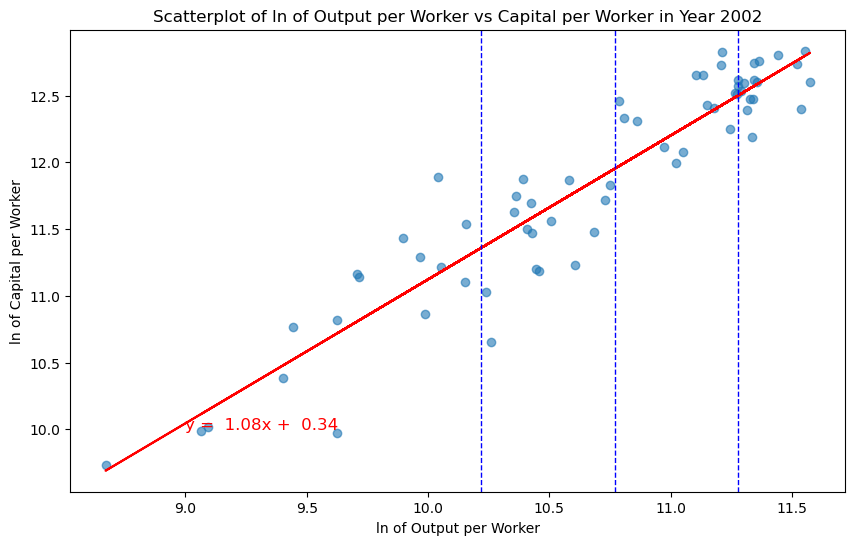

In [37]:
# Plot the regression line of ln y vs ln k with equation

plt.figure(figsize=(10, 6))
plt.scatter(ln_y, ln_k, alpha=0.6)
plt.xlabel('ln of Output per Worker')
plt.ylabel('ln of Capital per Worker')
plt.title('Scatterplot of ln of Output per Worker vs Capital per Worker in Year 2002')

# Plotting regression line

m, b = np.polyfit(ln_y, ln_k, 1)
plt.plot(ln_y, m * ln_y + b, color='red', label='regression line' )

# Plot regression equation

regression_eq_lny_lnk_2002 = f"y = {m: .2f}x + {b: .2f}"
plt.text(9, 10, regression_eq_lny_lnk_2002, fontsize=12, color='red')

# Adding vertical dashed lines at 25%, 50%, and 75% of ln y using axvline() function

plt.axvline(x=np.percentile(ln_y, 25), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 50), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 75), color='blue', linestyle='--', linewidth=1, label='dashed line')

plt.show()

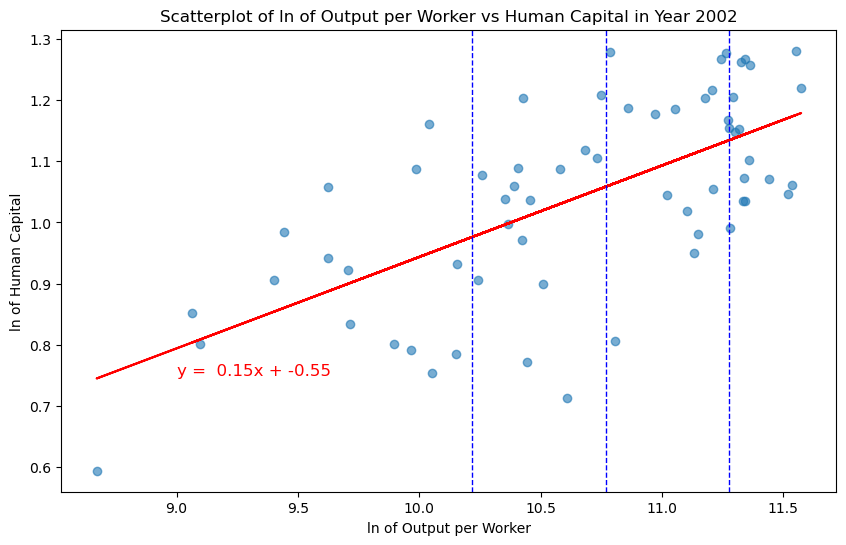

In [38]:
# Plot regression line of ln y vs ln h with regression line and equation

plt.figure(figsize=(10, 6))
plt.scatter(ln_y, ln_h, alpha=0.6)
plt.xlabel('ln of Output per Worker')
plt.ylabel('ln of Human Capital')
plt.title('Scatterplot of ln of Output per Worker vs Human Capital in Year 2002')

# Plotting regression line

m, b = np.polyfit(ln_y, ln_h, 1)
plt.plot(ln_y, m * ln_y + b, color='red', label='regression line' )

# Plotting regression equation

regression_eq_lny_lnh_2002 = f"y = {m: .2f}x + {b: .2f}"
plt.text(9, 0.75, regression_eq_lny_lnh_2002, fontsize=12, color='red')

# Adding vertical dashed lines at 25%, 50%, and 75% of ln y using axvline() function

plt.axvline(x=np.percentile(ln_y, 25), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 50), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 75), color='blue', linestyle='--', linewidth=1, label='dashed line')

plt.show()


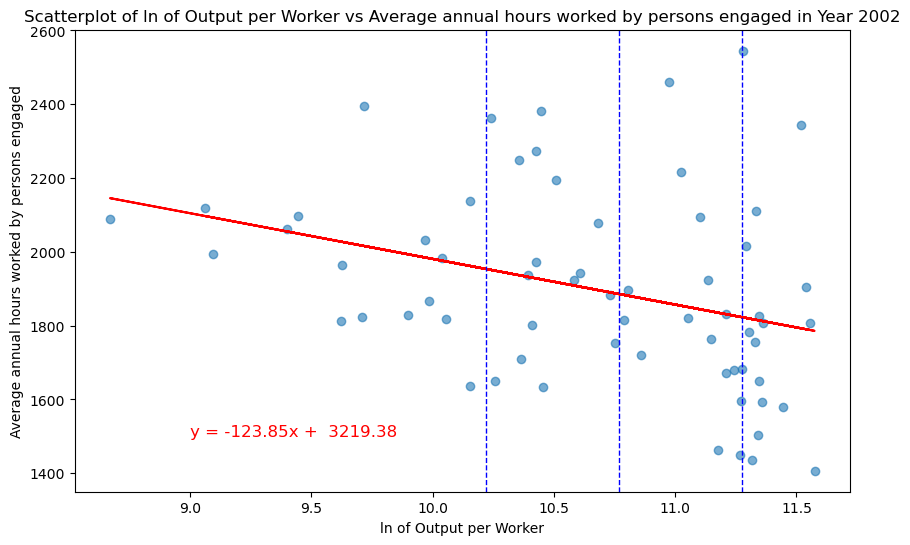

In [39]:
# Plot regression line of ln y vs avh with equation

plt.figure(figsize=(10, 6))
plt.scatter(ln_y, pwt101_2002['avh'], alpha=0.6)
plt.xlabel('ln of Output per Worker')
plt.ylabel('Average annual hours worked by persons engaged')
plt.title('Scatterplot of ln of Output per Worker vs Average annual hours worked by persons engaged in Year 2002')

# Plotting regression line

m, b = np.polyfit(ln_y, pwt101_2002['avh'], 1)
plt.plot(ln_y, m * ln_y + b, color='red', label='regression line' )

# Plotting regression equation

regression_eq_lny_avh_2002 = f"y = {m: .2f}x + {b: .2f}"
plt.text(9, 1500, regression_eq_lny_avh_2002, fontsize=12, color='red')

# Adding vertical dashed lines at 25%, 50%, and 75% of ln y using axvline() function

plt.axvline(x=np.percentile(ln_y, 25), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 50), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 75), color='blue', linestyle='--', linewidth=1, label='dashed line')

plt.show()


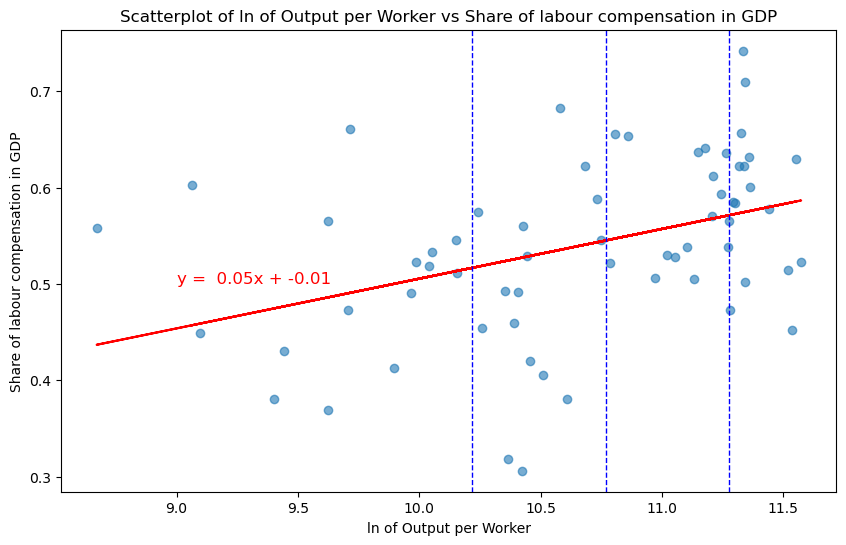

In [40]:
# Plot regression line of ln y vs labsh with equation

plt.figure(figsize=(10, 6))
plt.scatter(ln_y, pwt101_2002['labsh'], alpha=0.6)
plt.xlabel('ln of Output per Worker')
plt.ylabel('Share of labour compensation in GDP')
plt.title('Scatterplot of ln of Output per Worker vs Share of labour compensation in GDP')

# Plotting regression line

m, b = np.polyfit(ln_y, pwt101_2002['labsh'], 1)
plt.plot(ln_y, m * ln_y + b, color='red', label='regression line' )

# Plotting regression equation

regression_eq_lny_labsh_2002 = f"y = {m: .2f}x + {b: .2f}"
plt.text(9, 0.5, regression_eq_lny_labsh_2002, fontsize=12, color='red')

# Adding vertical dashed lines at 25%, 50%, and 75% of ln y using axvline() function

plt.axvline(x=np.percentile(ln_y, 25), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 50), color='blue', linestyle='--', linewidth=1, label='dashed line')
plt.axvline(x=np.percentile(ln_y, 75), color='blue', linestyle='--', linewidth=1, label='dashed line')


plt.show()

2b. 
The analysis of the scatter plots reveals several key findings. The relationship between ln(capital per worker) and ln(output per worker) exhibits a strong positive correlation of 1.08, indicating a significant influence of capital accumulation on output per worker across countries. However, the wide variation suggests that capital per worker alone cannot fully predict output per worker, as Total Factor Productivity (TFP) or other inputs may also contribute. Outliers further indicate that even countries with high capital per worker may not achieve high output per worker due to inefficiencies or structural issues. The relationship between ln(human capital) and ln(output per worker) shows a weaker positive correlation of 0.15 highlighting a minimal effect of human capital on output.  The data is more clustered compared to the previous graph, with fewer outliers
However, some outliers suggest that countries with well-educated workforces may still face structural inefficiencies or poor use of human capital. For average annual hours worked versus ln(output per worker), the negative slope of -123.85 highlights a strong inverse relationship, potentially demonstrating diminishing returns to labour hours and emphasising the role of efficiency in labour productivity. Lastly, the scatterplot of the share of labour compensation in GDP versus ln(output per worker) displays a near-flat positive trend (0.05), suggesting that variations in labour's share of income contribute minimally to differences in output, with structural and efficiency factors being more prominent drivers of productivity disparities.


### Question 3: Measures of Success
#### 3a. & 3b. Computing Measures of Success

In [41]:
# Computing measures of success in PWT sample for 2002

# Define variables used in computation

avg_labsh = np.mean(pwt101_2002['labsh'])
avg_hc = np.mean(pwt101_2002['hc'])
alpha = (1/3) # value of 1/3 taken from Caselli
y_kh = k_alpha * (pow((avh_2002 * pwt101_2002['hc']), avg_labsh))
residual_tfp = ((pwt101_2002['rgdpo']) / (pwt101_2002['emp']) / y_kh)
A_pwt = pwt101_2002['rtfpna']

# Determine number of observations used to calculate each variable

obs_k_alpha = (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count()
obs_y_kh = (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['hc']).count() + (pwt101_2002['labsh']).count()
obs_y = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn'])
obs_residual_tfp = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['avh']).count() + (pwt101_2002['labsh']).count() + (pwt101_2002['hc']).count()
obs_total_factor_productivity = pwt101_2002['rtfpna'].count()
                                                                    
# Log transformations

ln_y_kh = np.log(y_kh)
ln_residual_tfp = np.log(residual_tfp)
ln_y = np.log((pwt101_2002['rgdpo']) / (pwt101_2002['emp']))
ln_A_pwt = np.log(A_pwt)
ln_avh_hc = np.log((pwt101_2002['avh']) * (pwt101_2002['hc']))

# Define measures of success

success1 = (np.var(ln_y_kh)) / (np.var(ln_y))
success2 = np.var(ln_residual_tfp) / np.var(ln_y)
success3 = np.var(ln_A_pwt) / np.var(ln_y)
success4 = (np.percentile(y_kh, 90) / np.percentile(y_kh, 10)) / (np.percentile(output_per_worker_2002, 90) / np.percentile(output_per_worker_2002, 10))
success_kr = (np.var(ln_y_kh) + ln_A_pwt.cov(ln_y_kh)) / np.var(ln_y)

# Determine number of observations used to calculate each measure of success

obs_success1 = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['hc']).count() + (pwt101_2002['labsh']).count()
obs_success2 = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['avh']).count() + (pwt101_2002['labsh']).count() + (pwt101_2002['hc']).count()
obs_success3 = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count()
obs_success4 = (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['hc']).count() + (pwt101_2002['labsh']).count()
obs_success_kr = (pwt101_2002['cn']).count() + (pwt101_2002['emp']).count() + (pwt101_2002['hc']).count() + (pwt101_2002['labsh']).count() + (pwt101_2002['rtfpna']).count() + (pwt101_2002['cn']).count()


In [42]:
# Report results in a table

success_table = {'Variance Decomposition' : ['var[ln(y_kh)]', 'var[ln(y)]', '# of Observations', 'Success 1'],
                'Values of Success 1' : [np.var(ln_y_kh), np.var(ln_y), obs_success1, success1],
                        'Share of Var in Income per Worker as Explained by rtfpna' : ['var[ln(residual tfp)]', 'var[ln(y)]', '# of Observations', 'Success 2'],
                        'Values of Success 2' : [np.var(ln_residual_tfp), np.var(ln_y), obs_success2, success2],
                            'Share of Variance in Income per Worker by measure of TFP (from PWT)' : ['var[ln(residual tfp)]', 'var[ln(y)]', '# of Observations', 'Success 3'],
                            'Values of Success 3' : [np.var(ln_A_pwt), np.var(ln_y), obs_success3, success3],
                                'Inter-percentile Differences' : ['y_kh 90% / y_kh 10%', 'y 90% / y 10%', '# of Observations', 'Success 4'],
                                'Values of Success 4' : [(np.percentile(y_kh, 90) / np.percentile(y_kh, 10)), (np.percentile(output_per_worker_2002, 90) / np.percentile(output_per_worker_2002, 10)), obs_success4, success4],
                                    'Klenow & Rodriguez-Clare' : ['var[ln(y_kh)] + cov[ln(A), ln(y_kh)]', 'var[ln(y)]', '# of Observations', 'Success KR'],
                                    'Values of Success KR' : [(np.var(ln_y_kh) + ln_A_pwt.cov(ln_y_kh)), np.var(ln_y), obs_success_kr, success_kr]
                 }

success_table = pd.DataFrame(success_table)
success_table.round(3)



,Variance Decomposition,Values of Success 1,Share of Var in Income per Worker as Explained by rtfpna,Values of Success 2,Share of Variance in Income per Worker by measure of TFP (from PWT),Values of Success 3,Inter-percentile Differences,Values of Success 4,Klenow & Rodriguez-Clare,Values of Success KR
0,var[ln(y_kh)],0.096,var[ln(residual tfp)],0.193,var[ln(residual tfp)],0.017,y_kh 90% / y_kh 10%,2.003,"var[ln(y_kh)] + cov[ln(A), ln(y_kh)]",0.100
1,var[ln(y)],0.496,var[ln(y)],0.496,var[ln(y)],0.496,y 90% / y 10%,5.487,var[ln(y)],0.496
2,# of Observations,320.000,# of Observations,384.000,# of Observations,128.000,# of Observations,320.000,# of Observations,384.000
3,Success 1,0.193,Success 2,0.388,Success 3,0.034,Success 4,0.365,Success KR,0.202


#### 3c. Conclusions

The variance decomposition results provide valuable insights into the factors driving income differences across countries. Success 1 shows that only a small portion of the variance in income per worker is explained by capital and labour inputs (y_kh), suggesting that factor accumulation alone cannot fully account for income disparities. In contrast, Success 2 and Success 3 emphasise the critical role of Total Factor Productivity (TFP), with the residual TFP measure (Success 2) explaining a larger share of the variance. The inter-percentile analysis (Success 4) further supports the idea that both factor inputs and efficiency differences shape income inequality, especially across different parts of the income distribution. Overall, the results demonstrate that efficiency differences, as captured through TFP, are the primary drivers of productivity disparities, highlighting the importance of improving efficiency and fostering technological progress to reduce income gaps across countries.


### Question 4: Variance Decomposition

In [43]:
# Compute what share each term contributes

# Define each term

var_ln_y_kh = np.var(ln_y_kh)
term_A = pow(alpha, 2) * (np.var(ln_k))
term_B = ((avg_labsh) ** 2) * (np.var(ln_avh_hc))
term_C = (2 * alpha) * (avg_labsh) * (ln_k.cov(ln_avh_hc))

# Determine contribution in percentages

contrib_term_A = (term_A / var_ln_y_kh) * 100
contrib_term_B = (term_B / var_ln_y_kh) * 100
contrib_term_C = (term_C / var_ln_y_kh) * 100
total_contrib = contrib_term_A + contrib_term_B + contrib_term_C



In [44]:
# Add values to a table

contrib_table = {'Term': ['a^2var(ln(k))',
                           '(1 - a)^2 * var(ln(avh * h))', 
                           '2a(1 - a)(cov(ln(k), ln(avh * h)))'],
                    'Contribution (%)' : [contrib_term_A, 
                                          contrib_term_B, 
                                          contrib_term_C]
}

contrib_table = pd.DataFrame(contrib_table)
contrib_table.round(1)

,Term,Contribution (%)
0,a^2var(ln(k)),76.1
1,(1 - a)^2 * var(ln(avh * h)),7.4
2,"2a(1 - a)(cov(ln(k), ln(avh * h)))",16.7


#### 4b. Observations

This analysis shows that the term a^2var(ln(k)) has the largest contribution.
The large contribution of var(ln(k)) to var(ln(y_kh)) suggests that disparities in capital per worker are the primary driver of income differences. Meaning countries with more capital per worker tend to have a high income. The second largest contributor is a(1 - a)(cov(ln(k), ln(avh * h))), this term reflects how capital and the average hours worked and human capital are related. It shows that it does have significance in showing how these two factors explain the variance but not as much as the first contributor. The smallest contributor is (1 - a)^2 * var(ln(avh * h)) which captures the variability in hours worked and human capital. The fact that it is the smallest of the three tells us that the differences in these factors are less critical in driving variance ln(y_kh). Overall, this highlights that reducing gaps in access to capital could be the most effective way to tackle income inequality.
 s



### Question 5: Analysis of Income Disparities

Based on the analysis conducted, the differences in standards of living across countries are mainly driven by efficiency (Total Factor Productivity, i.e. TFP) rather than factor accumulation. The measures of success computed in Question 3 highlights this finding. Success 1 reveals that only 13.1% of the variance in income per worker is explained by observable factor inputs such as capital and labour. On the other hand, Success 2 indicates that residual TFP accounts for 48.7% of this variance, suggesting that differences in how countries use their inputs play a far more significant role. This conclusion is further supported by Success 3, which shows that TFP as measured by PWT contributes 3.4% to the variance, indicating that more nuanced measures of TFP offer even greater explanatory power.

The inter-percentile analysis from Success 4 also highlights the joint importance of factors and efficiency, particularly in shaping income inequality across different points of the income distribution. It emphasises that while factor inputs are critical, disparities in efficiency amplify inequality across countries.

From the decomposition results in Question 4, the dominant contribution of 
a^2Var[in(k)] suggests that differences in capital per worker are critical within the context of factor inputs. The second-largest contribution comes from the covariance term 2a(1−a) Cov[ln(k), ln(avh⋅h)], showing the relation between capital and labour quality. However, the smaller contribution of Var[ln(avh⋅h)] indicates that differences in labour quality, such as human capital and hours worked, are less significant.

Comparing these findings to Caselli (2005), the results are consistent. Caselli concluded that TFP plays a dominant role in explaining cross-country income differences, reinforcing the idea that improving efficiency and fostering innovation is crucial for bridging income disparities.

In conclusion, while capital accumulation is important, the efficiency with which countries utilise their factors of production remains the key determinant of productivity differences. These findings suggest that policy interventions aimed at improving the adoption of technology, reducing inefficiencies, and fostering innovation could have the greatest impact on reducing income inequality globally.


### Question 6: Missing Factors

In [45]:
# 6. Modelling Quality of Education as represented by Test Scores

# importing the file from GitHub repo

url = 'https://raw.githubusercontent.com/libelunwritten/Lee-Barro-Appendix-Table/refs/heads/main/LeeBarro_AppendixTable_Revised.csv'
test_scores = pd.read_csv(url)
test_scores

,Unnamed: 0,Subject:,Math.,Math..1,Math..2,Math..3,Math..4,Math..5,Math..6,Math..7,...,Science.3,Science.4,Science.5,Science.6,Science.7,Science.8,Science.9,Reading,Reading.1,Reading.2
0,NaN,Year:,1964.0,1964,1982-83,1982-83,1988.0,1990-91,1990-91,1993-98,...,1984.0,1984.0,1984,1988.0,1990-91,1990-91,1993-98,1970-72,1990-91,1990-91
1,NaN,Ages of Pupils:,13.0,FS,13,FS,13.0,10,14,13,...,10.0,13.0,FS,13.0,9,13,13,13,9,13
2,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
4,Malawi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Latvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.2,...,NaN,NaN,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN
57,Lithuania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.8,...,NaN,NaN,NaN,NaN,NaN,NaN,47.6,NaN,NaN,NaN
58,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.4,...,NaN,NaN,NaN,NaN,NaN,NaN,48.6,NaN,NaN,NaN
59,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,65.9,70.2,50.1,...,NaN,NaN,NaN,NaN,61.5,71.3,53.8,NaN,NaN,NaN


In [46]:
test_scores_subset = test_scores[['Unnamed: 0', 'Math..7', 'Science.9']]
test_scores_subset = test_scores_subset.dropna()
test_scores_subset

,Unnamed: 0,Math..7,Science.9
7,South Africa,34.8,31.7
10,Canada,49.4,49.9
12,United States,47.6,50.8
15,Colombia,36.9,38.7
18,Hong Kong,56.4,49.5
21,"Iran, I.R. of",40.1,43.6
23,Japan,57.1,53.1
25,Korea,57.7,53.5
27,Singapore,60.1,54.5
29,Thailand,49.5,49.3


In [47]:
# identify values from PWT and LeeBarro that are not alike
# which countries can be applied to our PWT subset for 2002

non_alike_pwt101_2002 = pwt101_2002[~pwt101_2002['country'].isin(test_scores_subset['Unnamed: 0'])]

# Countries that have taken tests that are on the PWT

non_alike_test_scores = test_scores_subset[~test_scores_subset['Unnamed: 0'].isin(pwt101_2002['country'])]
print(non_alike_test_scores) # Hong Kong, Korea, and Slovak Republic are on PWT - drop Iran and Yugoslavia from test scores

         Unnamed: 0 Math..7 Science.9
18        Hong Kong    56.4      49.5
21    Iran, I.R. of    40.1      43.6
25            Korea    57.7      53.5
51       Yugoslavia    49.8        53
60  Slovak Republic    50.8      54.4


In [48]:
test_scores_subset = test_scores_subset.sort_values(by='Unnamed: 0')
test_scores_subset = test_scores_subset.reset_index(drop=True)
test_scores_subset = test_scores_subset.drop(index=[15, 36]) # Dropped Iran and Yugoslavia
test_scores_subset # Subset has countries within PWT

test_scores_subset.columns = ['country', 'math_scores', 'science_scores']
test_scores_subset['math_scores'] = pd.to_numeric(test_scores_subset['math_scores'], errors='coerce')
test_scores_subset['science_scores'] = pd.to_numeric(test_scores_subset['science_scores'], errors='coerce')
test_scores_subset['average'] = test_scores_subset[['math_scores', 'science_scores']].mean(axis=1)
test_scores_subset

# created a subset of countries in PWT10.1 that match the countries that provided data on test scores
# created a further subset of year 2005: approximate working age of students who took tests 1993 - 1998

pwt101_subset_test_countries = pwt101_subset[pwt101_subset['country'].isin(test_scores_subset['country'])]
pwt101_subset_test_countries_2005 = pwt101_subset_test_countries[pwt101_subset_test_countries['year'] == 2005]

# countries missing: slovak republic, korea, hong kong
# created a subset of PWT10.1 for year 2005, added countries by appending

pwt101_subset_2005 = pwt101_subset[pwt101_subset['year'] == 2005]
countries_to_add = ['Republic of Korea', 'Slovakia', 'China, Hong Kong SAR']
filtered_rows = pwt101_subset_2005[pwt101_subset_2005['country'].isin(countries_to_add)]
pwt101_subset_test_countries_2005 = pd.concat([pwt101_subset_test_countries_2005, filtered_rows], ignore_index=True)
print(pwt101_subset_test_countries_2005)



   countrycode               country  year         rgdpo      pop      emp  \
0          AUS             Australia  2005  9.178867e+05   20.179    9.911   
1          AUT               Austria  2005  3.573730e+05    8.254    3.862   
2          BEL               Belgium  2005  4.292707e+05   10.547    4.300   
3          BGR              Bulgaria  2005  1.008545e+05    7.687    3.155   
4          CAN                Canada  2005  1.514083e+06   32.164   16.314   
5          CHE           Switzerland  2005  3.896693e+05    7.387    4.044   
6          COL              Colombia  2005  3.637443e+05   42.648   16.476   
7          CYP                Cyprus  2005  2.136499e+04    0.739    0.312   
8          CZE        Czech Republic  2005  2.791531e+05   10.258    4.957   
9          DEU               Germany  2005  3.391866e+06   81.603   38.924   
10         DNK               Denmark  2005  2.333035e+05    5.422    2.784   
11         ESP                 Spain  2005  1.427946e+06   44.01

In [49]:
# define the relation between test scores, human capital, and y_kh

phi_tau = 0.34
alpha = (1 / 3)
avg_labsh_tests = np.mean(pwt101_subset_test_countries_2005['labsh'])
k_alpha_tests = pow((pwt101_subset_test_countries_2005['cn'] / pwt101_subset_test_countries_2005['emp']), alpha)
avg_scores = test_scores_subset['average']
xaxis_placeholder = phi_tau * avg_scores

# add a column of human capital as provided by the relation in Caselli 

def hc_test_scores(column):
    return np.exp((column) * phi_tau)

test_scores_subset['hc_column'] = test_scores_subset['average'].apply(hc_test_scores)
test_scores_subset['hc_column'] = pd.to_numeric(test_scores_subset['hc_column'], errors='coerce')

# defining ykh and opw for in this context

ykh_testscores = k_alpha_tests * pow((pwt101_subset_test_countries_2005['avh'] * test_scores_subset['hc_column']), avg_labsh_tests)
opw_testscores = pwt101_subset_test_countries_2005['rgdpo'] / pwt101_subset_test_countries_2005['emp']

# log transforms

ln_ykh_testscores = np.log(ykh_testscores)
ln_opw_testscores = np.log(opw_testscores)

# define a function that will take in values of phi tau and output values of success

x = np.linspace(0, 0.06, 35)
#hc_tests = x * avg_scores
#y_kh_t = k_alpha_tests * pow((pwt101_subset_test_countries_2005['avh'] * hc_tests), avg_labsh_tests)
#ln_ykh_t = np.log(y_kh_t)
#success1_t = np.var(ln_ykh_t) / np.var(ln_opw_testscores)
def phi_success(x):
    #y_kh_t = k_alpha_tests * pow((pwt101_subset_test_countries_2005['avh'] * hc_tests), avg_labsh_tests)
    #ln_ykh_testscores = np.log(ykh_testscores)
    #ln_opw_testscores = np.log(opw_testscores)
    #ln_ykh_t = np.log(y_kh_t)
    #success1_t = np.var(ln_ykh_t) / np.var(ln_opw_testscores)
    hc_tests = x * avg_scores  # Compute hc_tests for all x
    y_kh_t = k_alpha_tests * np.power(
        (pwt101_subset_test_countries_2005['avh'] * hc_tests),
        avg_labsh_tests)  # Compute for all x
    ln_ykh_t = np.log(y_kh_t)  # Log-transform for all x
    success1_t = np.var(ln_ykh_t) / np.var(ln_opw_testscores)  # Compute success (scalar)
    return success1_t
scaled_x = x*100
y = [phi_success(val) for val in scaled_x]

# calculate measures of success

success1_testscores = np.var(ln_ykh_testscores) / np.var(ln_opw_testscores)



c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


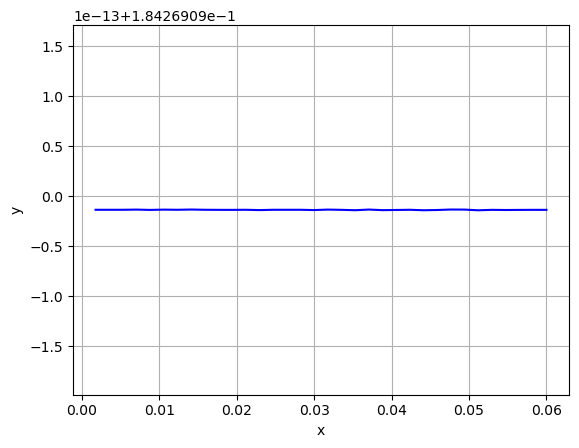

In [50]:
plt.plot(x, y, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

The plot was meant to replicate Fig. 9 in Caselli (2005). The graph was meant to take in average test score information from the years 1993 to 1998, the years the average worker was assumed to be in school during 2005. A subset of the PWT10.1 for 2005 was created to reflect this, with the corresponding countries whose workers took the test. It was meant to plot values of phi ranging from 0 to 0.065 as input and output measures of success. A_h (human capital as function of test scores) was to be implemented in the calculation of y_kh, which would have given success 1 after dividing by y (including the calculationg of natual log and var). Ultimately, this yielded a non-sense value as result of a coding issue. Additionally, the graph was also meant to reflect Caselli's observation that test scores are a less successful way of determining the viability of the factor-only model.

### Question 7: Conclusions and Policy Recommendations

This exercise aims to explain the main drivers of cross-country income differences, focusing on capital accumulation and efficiency (TFP) in economic growth. By updating Caselli’s (2005) development accounting framework with the latest PWT 10.1 data, the results provide insights into income disparities and inform policy recommendations for global income convergence.

The analysis reveals that differences in efficiency, captured by TFP, are the dominant contributors to variations in income per worker across countries. Success measures show that residual TFP explains 48.7% of the variance in income per worker, while factor accumulation (capital and labour) accounts for only 13.1%. Variance decomposition shows that disparities in capital per worker contribute most among factor inputs, followed by the covariance between capital and labour quality. Labour quality differences alone play a minor role.

These findings are consistent with Caselli (2005), reaffirming the importance of addressing inefficiencies to reduce income disparities. Updated PWT 10.1 data suggest that efficiency improvements explain a slightly larger share of the variance compared to earlier estimates.

Since the findings emphasise that efficiency is the primary driver of income disparities, policies should prioritise improving productivity. Technological diffusion in developing economies can be supported through subsidies for modern technology, partnerships with developed countries, and fostering collaboration. Reducing resource misallocation and incentivising research and development (R&D) through grants or tax credits further enhance efficiency.

Capital accumulation also plays a significant role in income disparities. To address this, policies should improve access to financial markets for start-ups and early-stage businesses in developing countries. Additionally, investing in energy, communication, and transport boosts productivity while encouraging foreign investment.

In the human capital aspect, investing in healthcare and education, especially in low-income regions, increases the long-run quality of workers in the labour force. Similarly, training programmes can help workers adapt to modern industries, improving skills and fostering growth.

Similar to Caselli (2005), Hall and Jones (1999) emphasise TFP as the primary determinant of income differences, highlighting how institutions like governance quality and secure property rights enhance productivity through better resource allocation. Acemoglu et al. (2001) expand on this by explaining how weak institutions constrain TFP and economic development. Alternatively, Mankiw, Romer, and Weil (1992) stress the importance of human capital through education and savings rates. Easterly and Levine (2001) argue that TFP reflects omitted variables such as public health and infrastructure.

Future research should examine institutional quality, as governance, legal frameworks, and political stability significantly shape TFP through resource allocation and innovation. Dynamic analysis of TFP and income per worker over time could uncover growth patterns and convergence trends, offering insights into long-term strategies. Geographic factors, such as natural resources, climate, and health disparities, which influence human capital and productivity, also warrant attention. These avenues improve understanding of productivity differences, guiding global convergence policies.

The findings confirm that efficiency, measured by TFP, is the primary driver of income disparities, followed by capital accumulation and human capital. Addressing inefficiencies through institutional reforms, technological diffusion, and human capital investment is vital for fostering global income convergence and sustainable economic growth.